<a href="https://colab.research.google.com/github/MasDiptha12/Machine-Learning/blob/main/Week_4/Compas_Score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from google.colab import files
uploaded = files.upload()

Saving compas-scores-two-years.csv to compas-scores-two-years.csv


In [2]:
# Import pustaka yang dibutuhkan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Membaca dataset yang telah diupload
df = pd.read_csv('compas-scores-two-years.csv')

# Menampilkan 5 data teratas
df.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0


In [3]:
# Melihat informasi umum dataset
df.info()

# Melihat statistik deskriptif
df.describe(include='all')

# Melihat jumlah data yang null
df.isnull().sum()

# Menghapus kolom yang banyak missing value atau tidak relevan untuk prediksi
df_cleaned = df.drop(columns=[
    'id', 'name', 'first', 'last', 'compas_screening_date',
    'dob', 'c_jail_in', 'c_jail_out', 'c_case_number', 'c_offense_date',
    'c_arrest_date', 'c_charge_desc', 'r_charge_desc', 'violent_recid',
    'is_violent_recid', 'vr_case_number', 'vr_charge_degree', 'vr_offense_date'
], errors='ignore')

# Menghapus baris dengan nilai null
df_cleaned = df_cleaned.dropna()

# Encode data kategorikal menggunakan Label Encoding
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in df_cleaned.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_cleaned[column] = le.fit_transform(df_cleaned[column])
    label_encoders[column] = le

df_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 53 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7214 non-null   int64  
 1   name                     7214 non-null   object 
 2   first                    7214 non-null   object 
 3   last                     7214 non-null   object 
 4   compas_screening_date    7214 non-null   object 
 5   sex                      7214 non-null   object 
 6   dob                      7214 non-null   object 
 7   age                      7214 non-null   int64  
 8   age_cat                  7214 non-null   object 
 9   race                     7214 non-null   object 
 10  juv_fel_count            7214 non-null   int64  
 11  decile_score             7214 non-null   int64  
 12  juv_misd_count           7214 non-null   int64  
 13  juv_other_count          7214 non-null   int64  
 14  priors_count            

,sex,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
9,1,21,2,2,0,3,0,0,1,428.0,...,5,2,184,327,295,1,0,428,1,1
45,1,25,0,2,0,10,0,0,9,-1.0,...,9,0,263,187,167,9,6,8,1,1
46,1,35,0,0,1,8,0,4,13,-1.0,...,3,1,286,214,188,13,0,9,1,1
78,0,26,0,0,0,4,0,0,1,-1.0,...,3,1,187,130,132,1,1,11,1,1
79,1,27,0,2,0,7,0,0,1,-43.0,...,8,0,318,407,416,1,0,258,1,1


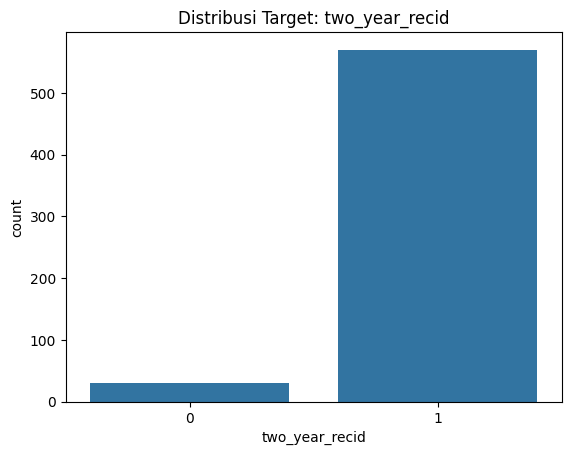

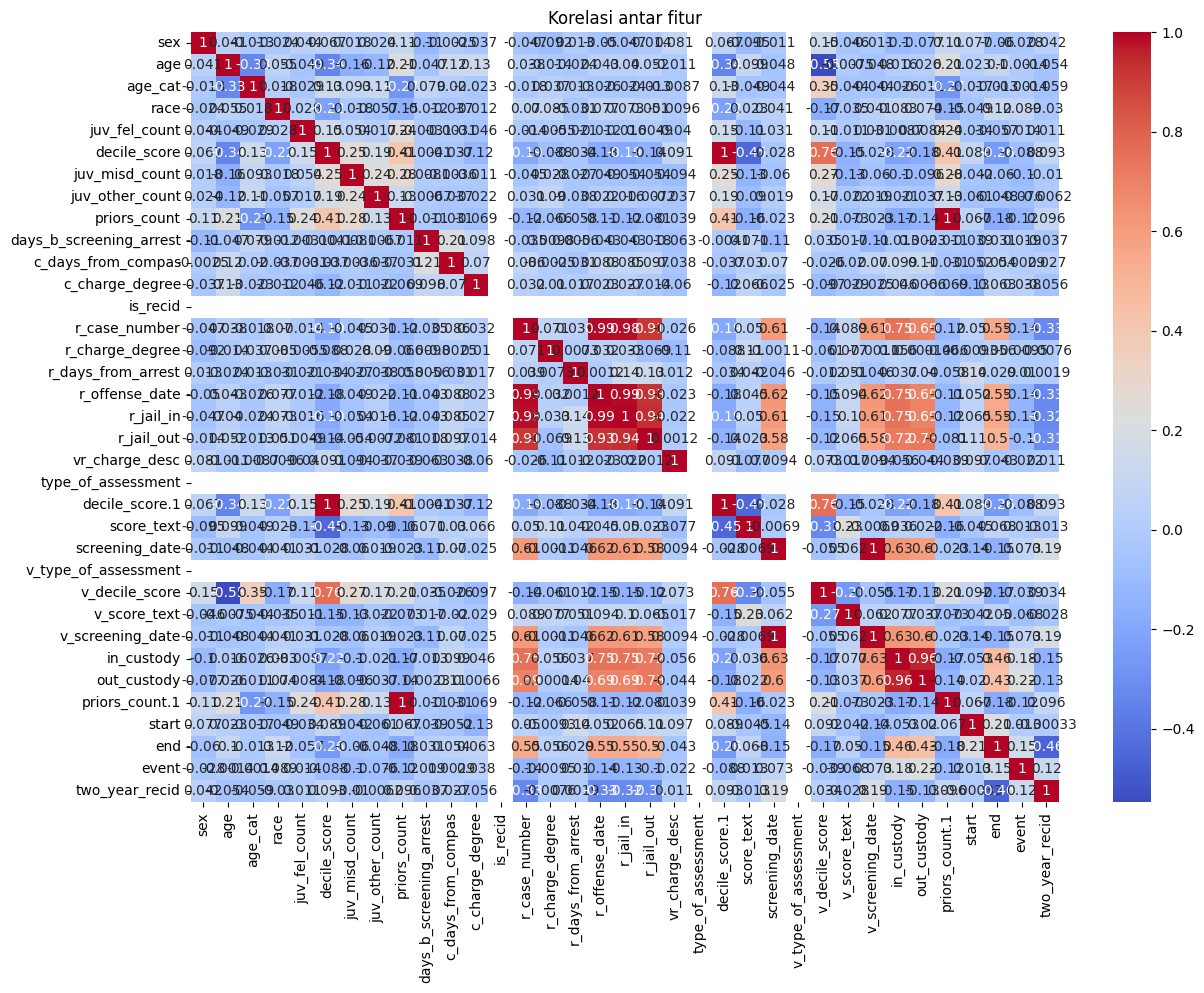

In [4]:
# Visualisasi distribusi dari target (misalnya: two_year_recid)
sns.countplot(x='two_year_recid', data=df_cleaned)
plt.title('Distribusi Target: two_year_recid')
plt.show()

# Heatmap korelasi antar fitur
plt.figure(figsize=(14, 10))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi antar fitur')
plt.show()

In [5]:
# Pisahkan fitur dan target
X = df_cleaned.drop('two_year_recid', axis=1)
y = df_cleaned['two_year_recid']

# Split data untuk training dan testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gunakan RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)

# Menampilkan metrik
print(f"Akurasi: {accuracy:.4f}")
print(f"Presisi: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

Akurasi: 0.9750
Presisi: 0.9744
Recall: 1.0000
F1 Score: 0.9870
AUC: 0.9934


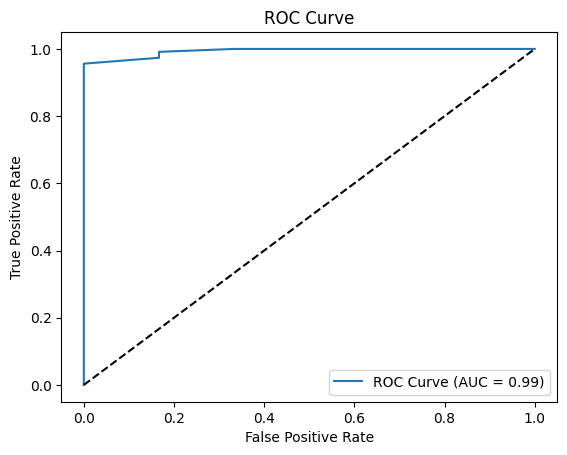

In [7]:
# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Garis baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


### **Penjelasan Matematis**

#### **Akurasi**
Akurasi mengukur proporsi prediksi yang benar terhadap seluruh data.
$$
\text{Akurasi} = \frac{TP + TN}{TP + TN + FP + FN}
$$




#### **Precision**
Presisi mengukur berapa banyak yang benar-benar positif.
$$
\text{Presisi} = \frac{TP}{TP + FP}
$$



#### **Recall**
Recall mengukur dari semua data positif yang benar.
$$
\text{Recall} = \frac{TP}{TP + FN}
$$



#### **F1 Score**
F1 Score adalah rata-rata harmonik dari presisi dan recall.
$$
F_1 = 2 \times \frac{\text{Presisi} \times \text{Recall}}{\text{Presisi} + \text{Recall}}
$$




#### **AUC (Area Under Curve)**
AUC mengukur kemampuan model dalam membedakan antara kelas positif dan negatif (0 dan 1)